# 제4장 군집분석

## 2. 파이썬 군집분석 사례분석 : beer 데이터

### (1) 데이터 읽기

In [1]:
# 주요 패키지 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 읽기
beer = pd.read_csv("./data/beerbrand.csv", index_col='name')
beer.head()

,calories,sodium,alcohol,cost
name,,,,
BUDWEISER,144,15,4.7,0.43
SCHLITZ,151,19,4.9,0.43
LOWENBRAU,157,15,4.9,0.48
KRONENBOURG,170,7,5.2,0.73
HEINEKEN,152,11,5.0,0.77


In [2]:
# 기술통계량 구하기
beer.describe()

,calories,sodium,alcohol,cost
count,20.000000,20.000000,20.000000,20.000000
mean,132.400000,14.950000,4.440000,0.496500
std,30.257491,6.581273,0.759778,0.143757
min,68.000000,6.000000,2.300000,0.280000
25%,110.250000,9.500000,4.200000,0.430000
50%,144.000000,15.000000,4.650000,0.440000
75%,150.250000,19.000000,4.900000,0.485000
max,175.000000,27.000000,5.500000,0.790000


### (2) 데이터 표준화

In [3]:
# 표준화 패키지 불러오기
from sklearn.preprocessing import StandardScaler
# 표준화 시행
zbeer = StandardScaler().fit_transform(beer)
type(zbeer)
zbeer_frame=pd.DataFrame(zbeer)
zbeer_frame.columns=beer.columns
zbeer_frame.describe()

,calories,sodium,alcohol,cost
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,-1.554312e-16,7.771561e-17,-1.634803e-15,-3.747003e-16
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00
min,-2.183691e+00,-1.395248e+00,-2.889782e+00,-1.545138e+00
25%,-7.510676e-01,-8.496201e-01,-3.240877e-01,-4.746037e-01
50%,3.933356e-01,7.794680e-03,2.835767e-01,-4.032347e-01
75%,6.052621e-01,6.313691e-01,6.211680e-01,-8.207432e-02
max,1.444491e+00,1.878518e+00,1.431387e+00,2.094679e+00


### (3) 계층적 군집분석 - 최단연결법

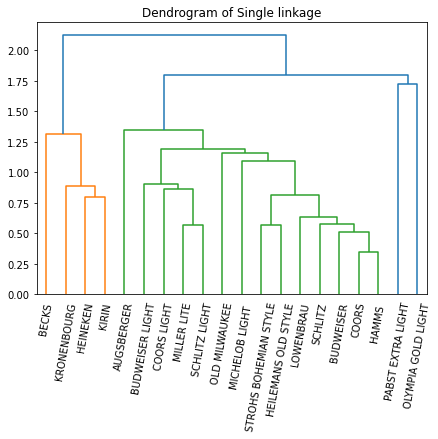

In [5]:
# 패키지불러오기
import scipy.cluster.hierarchy as sch
#계층적군집분석 시행하기 : 최단연결법
slink=sch.linkage(zbeer, 'single')
# method : 'single', 'complete', 'average', 'median', 'ward'
plt.figure(figsize=(7,5))
sch.dendrogram(slink, leaf_rotation=80, leaf_font_size=10, labels=beer.index)
plt.title("Dendrogram of Single linkage")
plt.show()

### (4) 계층적 군집분석 - 와드연결법

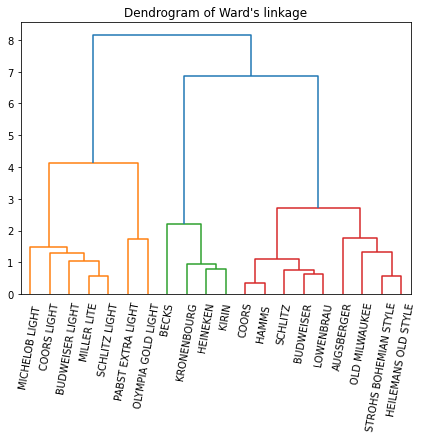

In [7]:
# 계층적 군집분석 시행: 와드연결법
wlink = sch.linkage(zbeer, 'ward')

plt.figure(figsize=(7,5))
sch.dendrogram(wlink, leaf_rotation=80, leaf_font_size=10, labels=beer.index)
plt.title("Dendrogram of Ward's linkage")
plt.show()

### (5) 계층적 군집분석 - 중심연결법

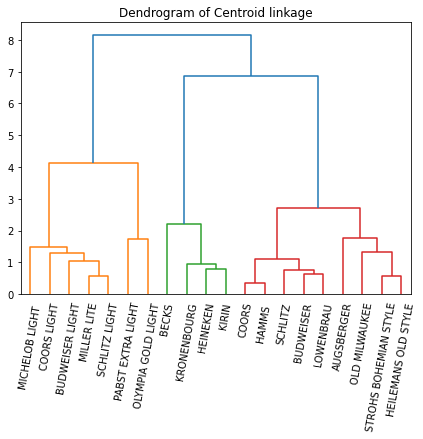

In [8]:
# 계층적 군집분석 : 중심연결법
clink = sch.linkage(zbeer, 'centroid')

plt.figure(figsize=(7,5))
sch.dendrogram(wlink, leaf_rotation=80, leaf_font_size=10, labels=beer.index)
plt.title("Dendrogram of Centroid linkage")
plt.show()

### (6) 소속 군집 알기

In [10]:
from sklearn.cluster import AgglomerativeClustering
help(AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster._agglomerative:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, affinity='deprecated', metric=None, memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
 |  
 |  Agglomerative Clustering.
 |  
 |  Recursively merges pair of clusters of sample data; uses linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      The metric to use when calculating distance between instances in a
 |      feature array. If metric is a string or callable, it must be one of
 |      the options allowed by :func:`sklearn

In [12]:
# 계층적 군집분석 : ward 방법
wcluster=AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')

# 소속군집
member=wcluster.fit_predict(zbeer)
member

array([0, 0, 0, 2, 2, 0, 0, 0, 3, 3, 0, 3, 3, 2, 2, 1, 0, 0, 1, 3],
      dtype=int64)

### (7) 군집별 평균계산

In [13]:
# 군집별 평균계산
member1=pd.DataFrame(member, columns=['cluster'], index=beer.index)
data_combined=beer.join(member1)
data_combined.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,149.00,20.444444,4.800,0.415556
1,70.00,10.500000,2.600,0.420000
2,155.25,10.750000,4.975,0.762500
3,109.20,10.200000,4.100,0.460000
